# Rolling statistics

The following makes use of the *zoo* package. You may need to install it from
[CRAN](https://cran.r-project.org/package=zoo) using the code
`install.packages("zoo")` if you want to run this on your computer. (The
package is already installed on the notebook container, however.)

In [1]:
library(zoo)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



The file "zpresidents.RData" was created in an earlier example.

In [2]:
load("zpresidents.RData")

In [3]:
zpresidents.o <- na.omit(zpresidents)

In [4]:
zpresidents.o8 <- zpresidents.o[1:8]

In [5]:
rollmean(zpresidents.o8,k=7)

 1946 Q1  1946 Q2 
61.71429 54.28571 

In [6]:
rollmean(zpresidents.o8,k=7,align="left")

 1945 Q2  1945 Q3 
61.71429 54.28571 

In [7]:
rollmean(zpresidents.o8,k=7,align="right")

 1946 Q4  1947 Q1 
61.71429 54.28571 

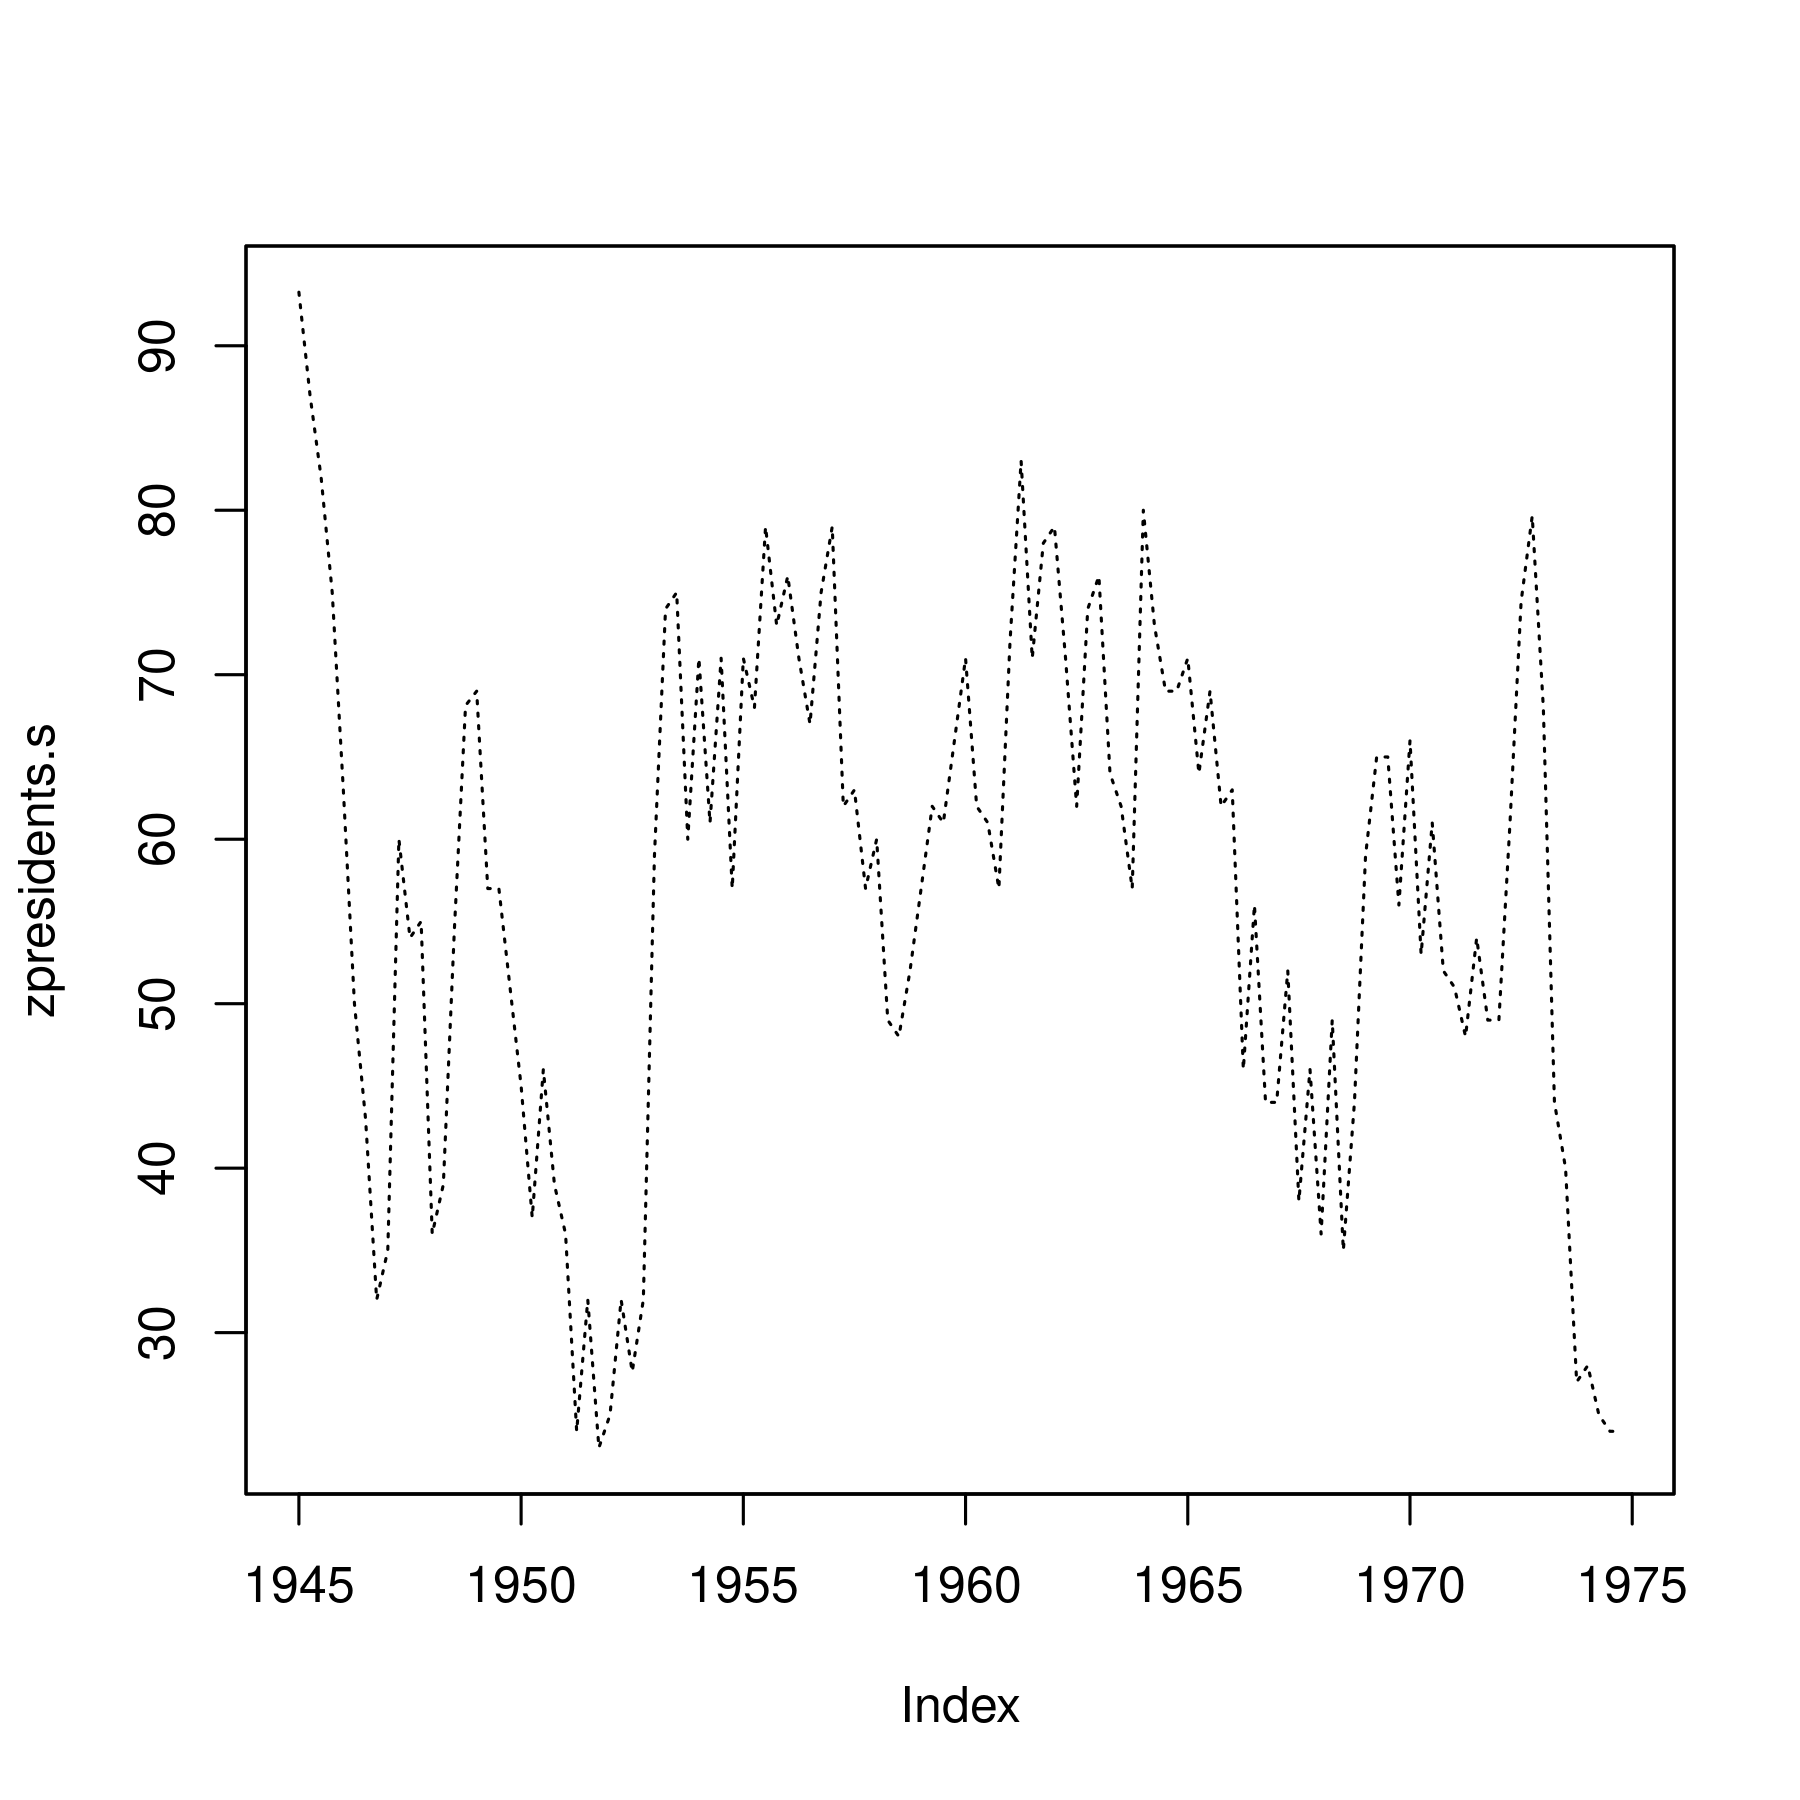

In [8]:
zpresidents.s <- na.spline(zpresidents)
plot(zpresidents.s,lty=3)

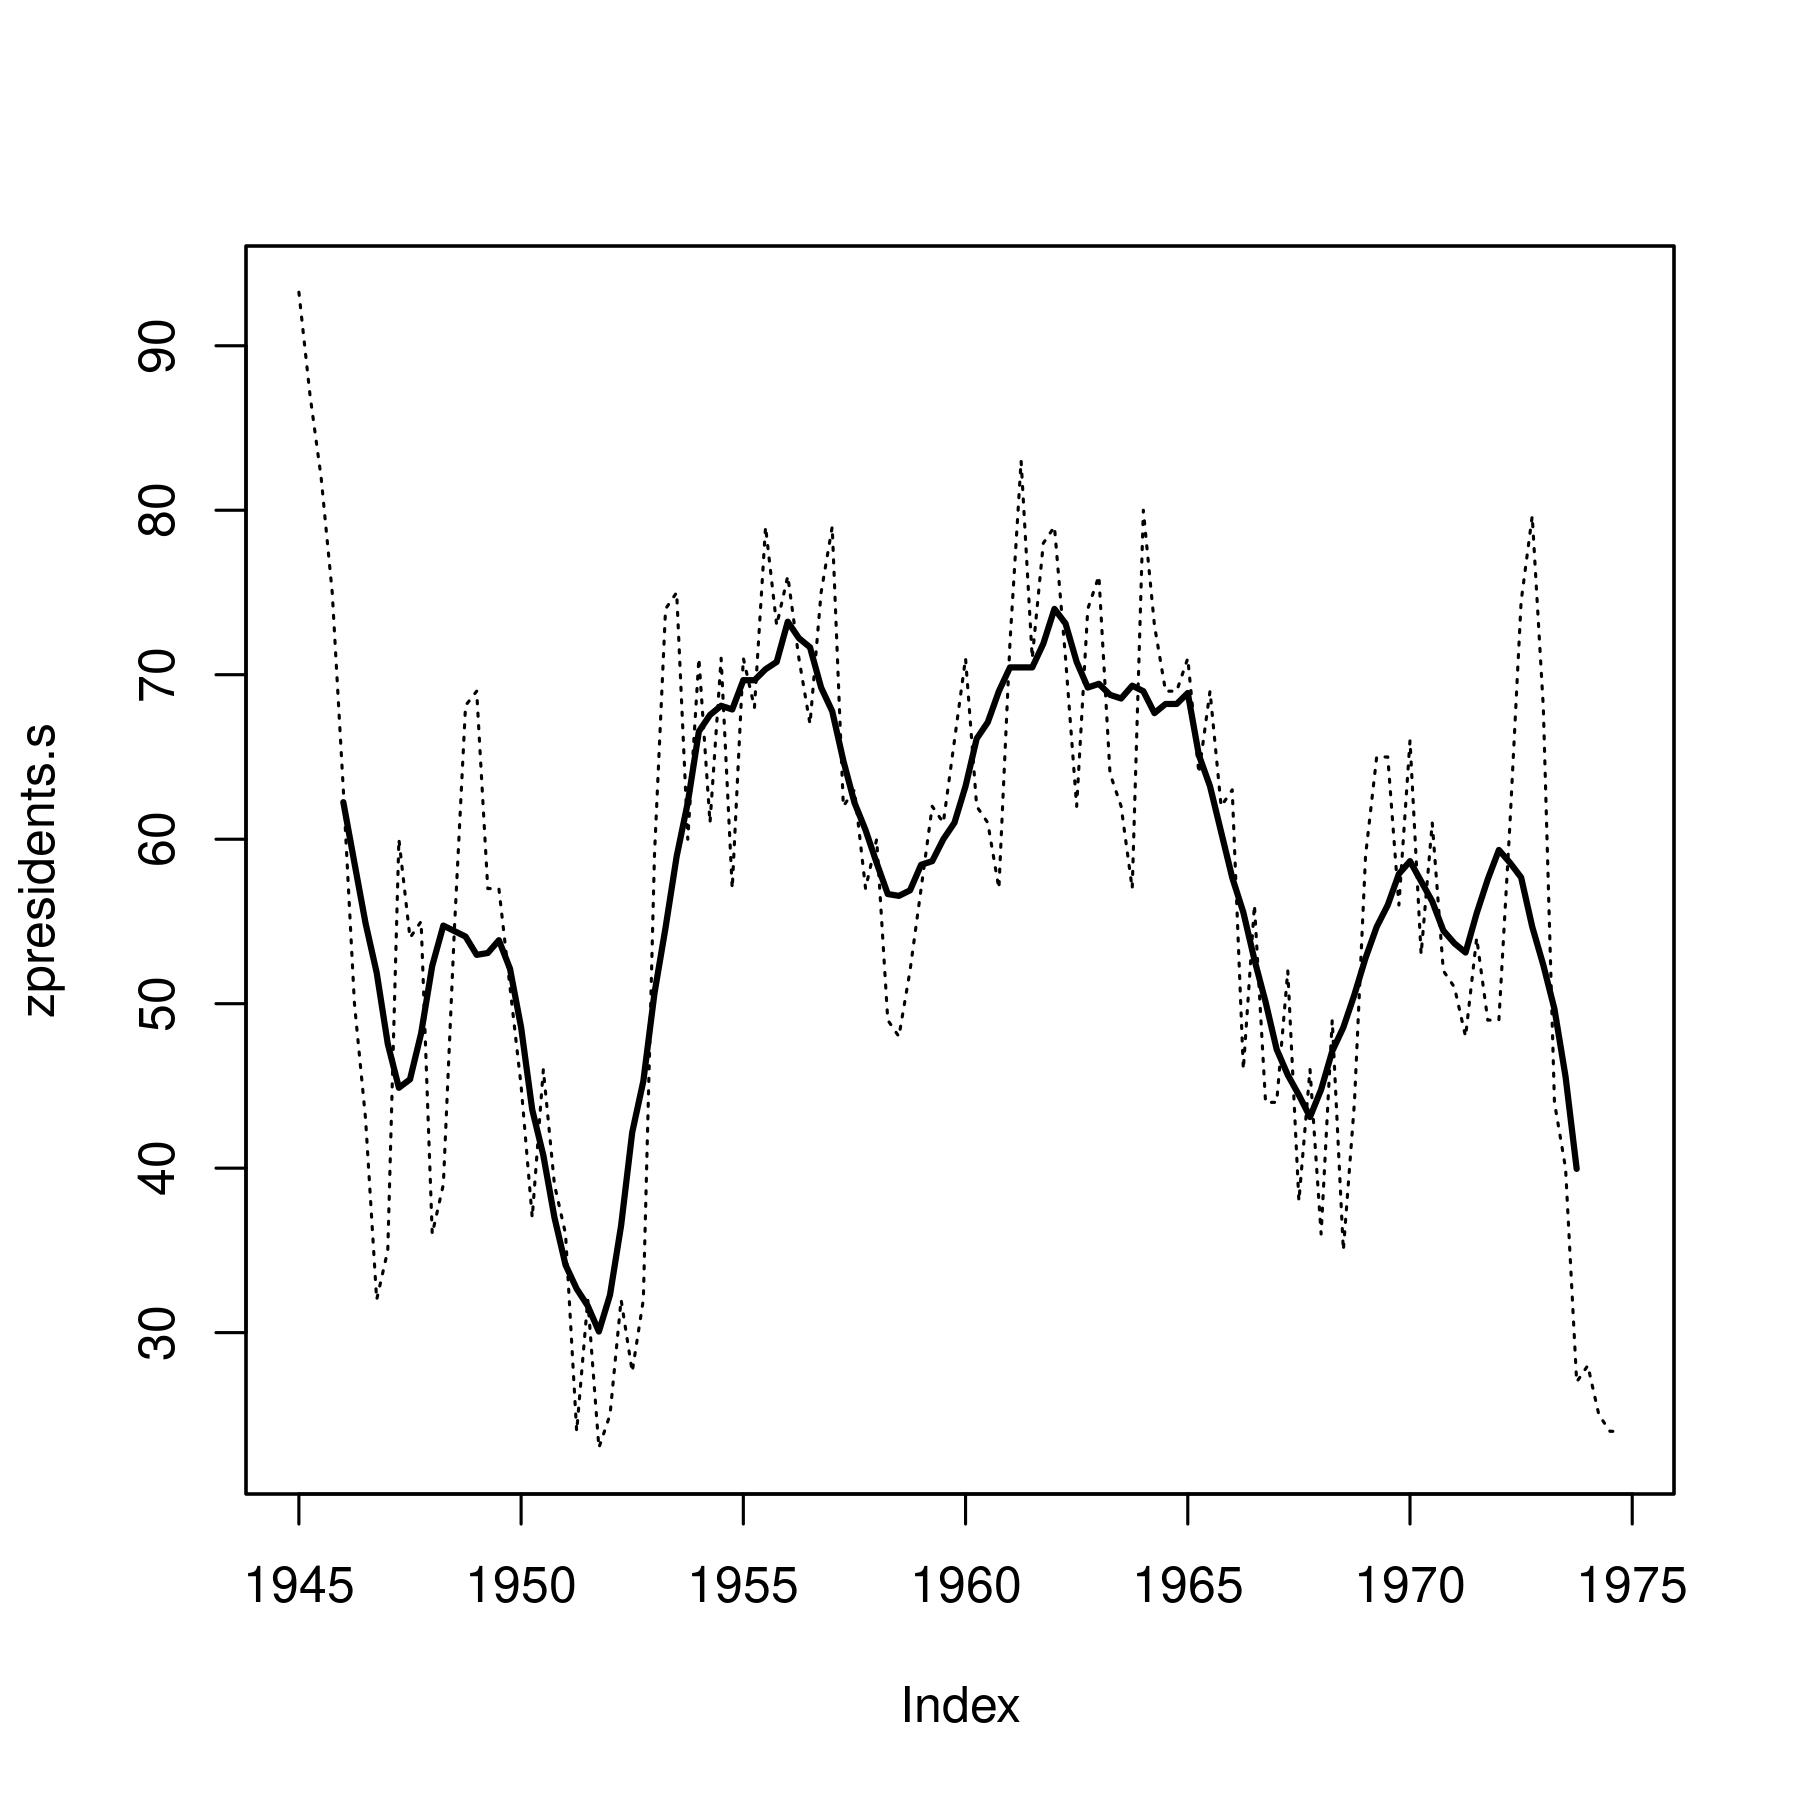

In [9]:
zpresidents.m <- rollmean(zpresidents.s,k=9)
plot(zpresidents.s,lty=3)
lines(zpresidents.m,lwd=2)

In [10]:
zpresidents.sd <- rollapply(zpresidents.s,
                            width=9,
                            FUN=sd)

In [11]:
tv <- qt(.975,df=8)
zpresidents.u <- zpresidents.m+tv*zpresidents.sd/sqrt(8)
zpresidents.l <- zpresidents.m-tv*zpresidents.sd/sqrt(8)

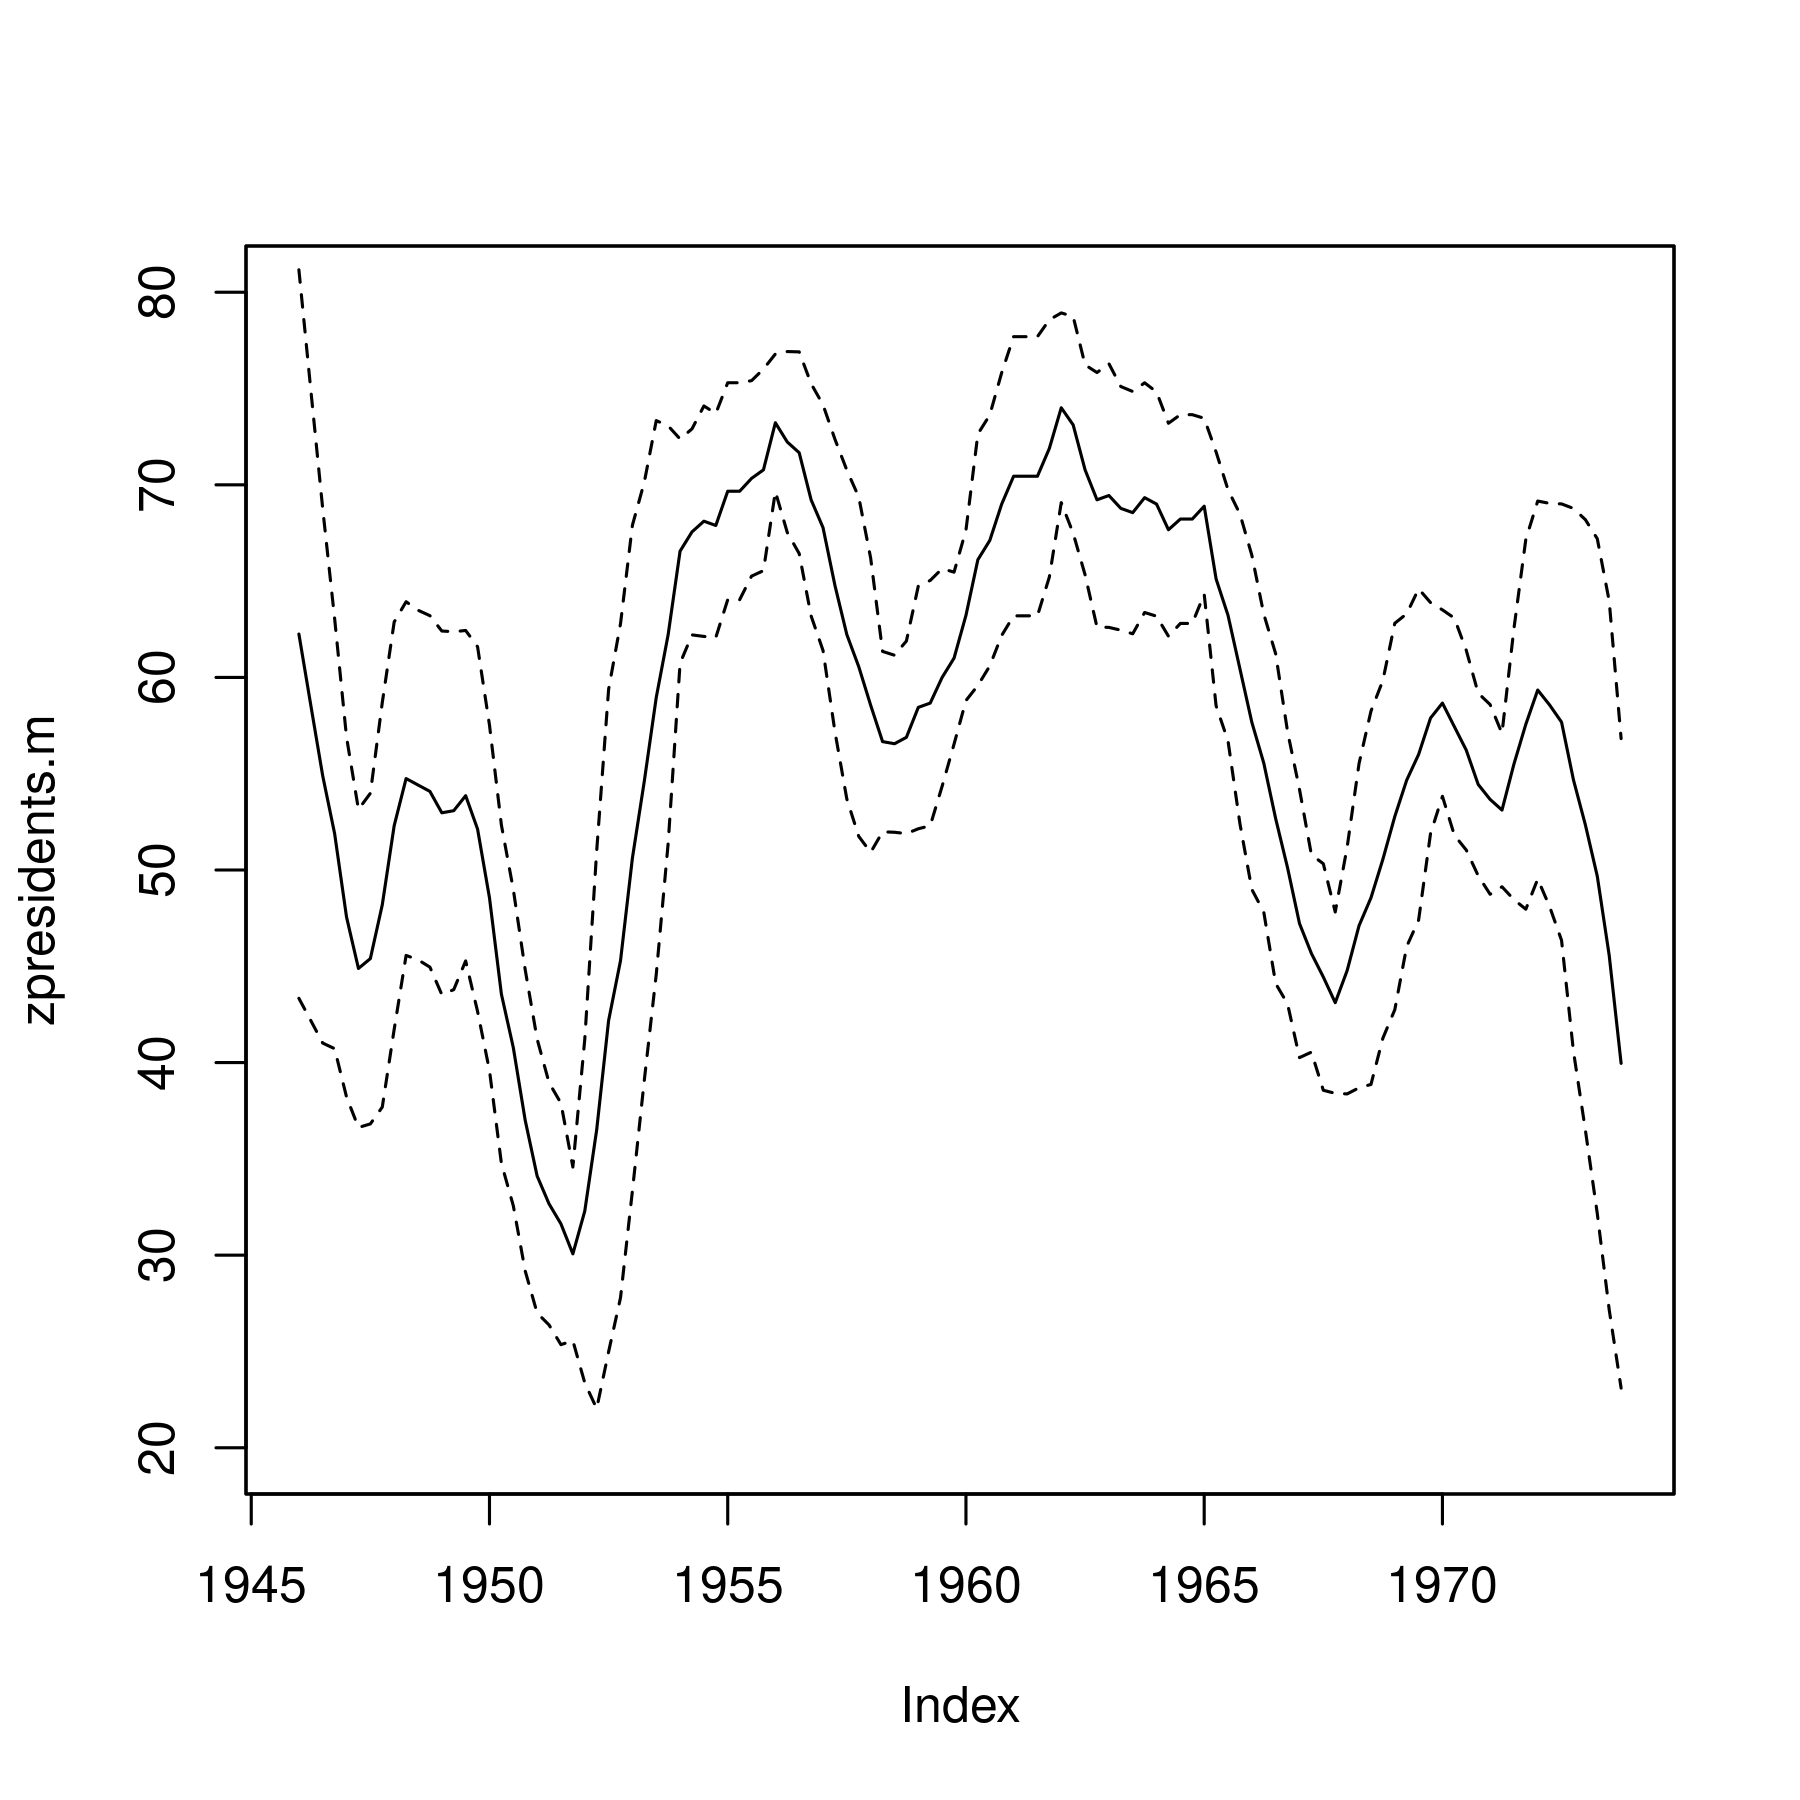

In [12]:
plot(zpresidents.m,ylim=c(20,80))
lines(zpresidents.u,lty=2)
lines(zpresidents.l,lty=2)